In [1]:
setwd('/import/DB/momo-6.12.0.199/runtime/PIPELINE/taxonkit3//GC/')

In [2]:
library(pROC)
require(xgboost)
require(Matrix)
require(data.table)
if (!require('vcd')) {
  install.packages('vcd')
}
library(caret)   #
library(openxlsx) #
# library(pROC)

set.seed(20230320)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Loading required package: xgboost

Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.2.3"
Loading required package: data.table

Warning message:
"package 'data.table' was built under R version 4.2.3"
Loading required package: vcd

Loading required package: grid

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
Warning message:
"package 'openxlsx' was built under R version 4.2.3"


In [3]:
load('./co.train-test.rda')

In [4]:
ls()

[1] "X_test"  "X_train" "y_test"  "y_train"

In [5]:
colnames(X_train)

[1] "Age"         "CKMB"        "CRP"         "Ca"          "Cl"         
 [6] "LYM_Count"   "Na"          "eGFR"        "BASO_Count"  "LYM_Percent"
[11] "P"           "RBP"         "ALP"         "AMY"         "CA724"      
[16] "GR"          "HDL.CH"      "K"           "APO.A1"      "ALB"        
[21] "CA50"        "AFU"         "RBC"         "TP"          "CA242"      
[26] "Sex.Male"

In [6]:
xgb <- xgboost(data = data.matrix(X_train), 
               label = y_train, 
               , num_parallel_tree = 1000
               , subsample = 0.5
               , colsample_bytree = 0.5
               , objective = "binary:logistic",
               max_depth = 15, 
               nround=50, 
               nthread = 30
)

[1]	train-logloss:0.583466 
[2]	train-logloss:0.505827 
[3]	train-logloss:0.445726 
[4]	train-logloss:0.397381 
[5]	train-logloss:0.357345 
[6]	train-logloss:0.323978 
[7]	train-logloss:0.295967 
[8]	train-logloss:0.271907 
[9]	train-logloss:0.251001 
[10]	train-logloss:0.232997 
[11]	train-logloss:0.217174 
[12]	train-logloss:0.203257 
[13]	train-logloss:0.190796 
[14]	train-logloss:0.179676 
[15]	train-logloss:0.169694 
[16]	train-logloss:0.160657 
[17]	train-logloss:0.152446 
[18]	train-logloss:0.144931 
[19]	train-logloss:0.138112 
[20]	train-logloss:0.131859 
[21]	train-logloss:0.126116 
[22]	train-logloss:0.120751 
[23]	train-logloss:0.115834 
[24]	train-logloss:0.111266 
[25]	train-logloss:0.107025 
[26]	train-logloss:0.103081 
[27]	train-logloss:0.099411 
[28]	train-logloss:0.095969 
[29]	train-logloss:0.092757 
[30]	train-logloss:0.089757 
[31]	train-logloss:0.086933 
[32]	train-logloss:0.084268 
[33]	train-logloss:0.081776 
[34]	train-logloss:0.079419 
[35]	train-logloss:0.07

In [7]:
pre_xgb = round(predict(xgb, data.matrix(X_test)))

In [8]:
tab = table(y_test,pre_xgb,dnn=c("true","pre"))

In [9]:
class(y_test)

[1] "numeric"

In [10]:
tab

    pre
true   0   1
   0 170  52
   1  41 151

In [11]:
zhibiao = caret::confusionMatrix(tab,mode = "everything")
zhibiao

Confusion Matrix and Statistics

    pre
true   0   1
   0 170  52
   1  41 151
                                          
               Accuracy : 0.7754          
                 95% CI : (0.7321, 0.8147)
    No Information Rate : 0.5097          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5501          
                                          
 Mcnemar's Test P-Value : 0.2998          
                                          
            Sensitivity : 0.8057          
            Specificity : 0.7438          
         Pos Pred Value : 0.7658          
         Neg Pred Value : 0.7865          
              Precision : 0.7658          
                 Recall : 0.8057          
                     F1 : 0.7852          
             Prevalence : 0.5097          
         Detection Rate : 0.4106          
   Detection Prevalence : 0.5362          
      Balanced Accuracy : 0.7748          
                 

In [12]:
tab

    pre
true   0   1
   0 170  52
   1  41 151

In [13]:
#
xgboost_roc <- roc(y_test,as.numeric(pre_xgb))
xgboost_roc

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = y_test, predictor = as.numeric(pre_xgb))

Data: as.numeric(pre_xgb) in 222 controls (y_test 0) < 192 cases (y_test 1).
Area under the curve: 0.7761

In [14]:
# plot(xgboost_roc, print.auc=TRUE, auc.polygon=TRUE,
#      grid=c(0.1, 0.2),grid.col=c("green", "red"),
#      max.auc.polygon=TRUE,auc.polygon.col="skyblue",
#      print.thres=TRUE,main='ROC curve')

In [15]:
library(magrittr)
library(tidyverse)
library(fastshap)
library(shapviz)
#install.packages("xgboost")|
library(xgboost)
library(caret)
library(pROC)
library(tibble)
library(ROCit)

Warning message:
"package 'magrittr' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()     masks data.table::between()
x tidyr::expand()      masks Matrix::expand()
x tidyr::extract()     masks magr

In [16]:
feature_values <-  data.matrix(X_test) %>%
  as.data.frame() %>% 
  mutate_all(scale) %>%
  gather(feature, feature_value) %>% 
  pull(feature_value)



shap_df  = xgb %>%
  predict(newdata = data.matrix(X_test),predcontrib = TRUE)  %>% 
  as.data.frame() %>%
  select(-BIAS) %>%
  gather(feature, shap_value) %>%
  mutate(feature_value = feature_values) %>%
  group_by(feature) %>%
  mutate(shap_importance = mean(abs(shap_value)))


Warning message:
"attributes are not identical across measure variables; they will be dropped"


In [25]:
### 
ss = shap_df[,c(1,4)] 
ss = ss[!duplicated(ss$shap_importance),]

tz = ss[order(-ss$shap_importance), 1] 

tz1 = tz$feature[1:26]

shap_df2 = shap_df %>% filter(feature %in% tz1)
library(ggbeeswarm)

Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`
Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`


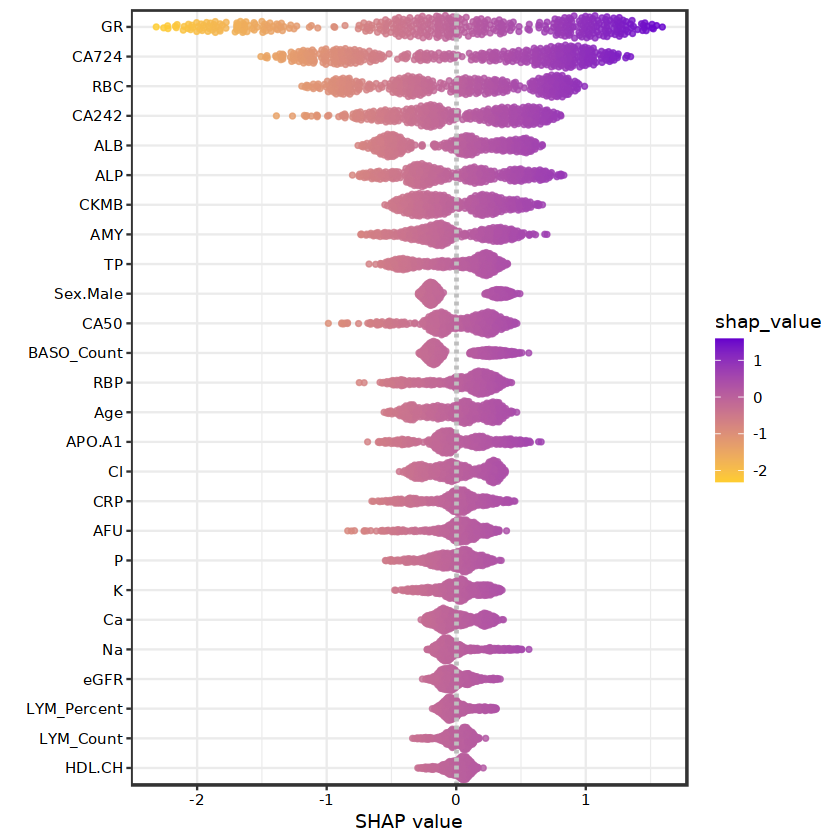

In [27]:
ggplot(shap_df2, aes(x = shap_value, y = reorder(feature, shap_importance))) +
  geom_quasirandom(groupOnX = FALSE, varwidth = TRUE, size =1, alpha = 0.8, aes(color = shap_value)) +
  scale_color_gradient(low = "#ffcd30", high = "#6600cd") +
  labs(x="SHAP value",y="")+
  theme_bw()+
  theme(axis.text = element_text(color = "black"),
        panel.border = element_rect(linewidth = 1))+
  geom_vline(xintercept = 0,linetype="dashed",color="grey",linewidth=1)

ggsave('./EGC.GC.XGBoost.figure1.pdf',width = 6,height = 8)

Warning message in brewer.pal(12, "Accent"):
"n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
"


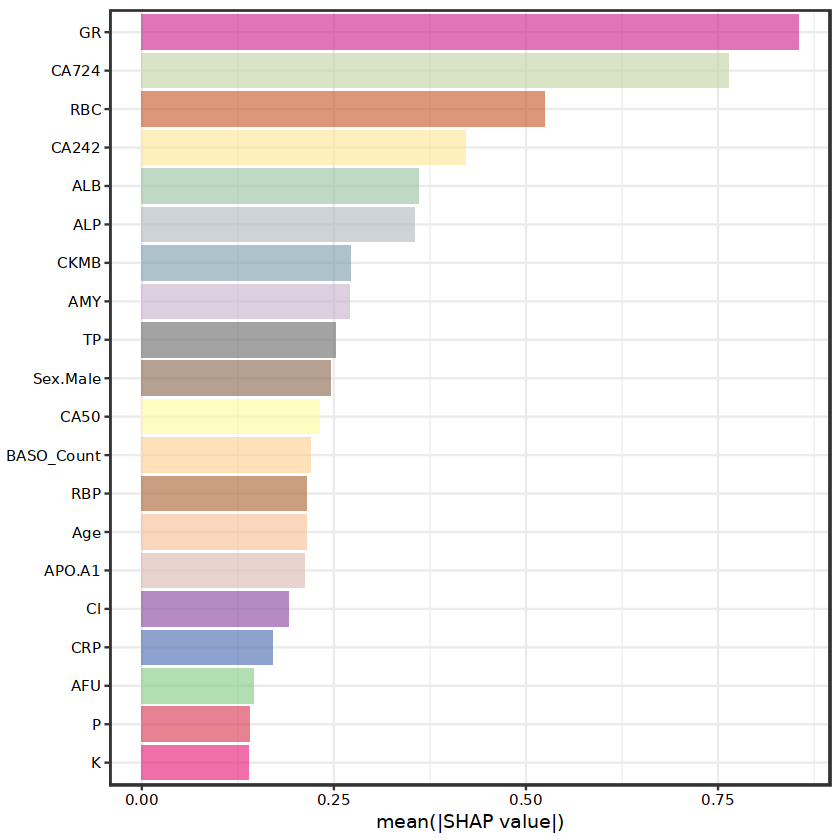

In [19]:
colorcount = 20

library(RColorBrewer )
p2 <- shap_df2 %>% 
  select(feature, shap_importance) %>%
  filter(row_number() == 1) %>%
  ggplot(aes(x = reorder(feature, shap_importance), y = shap_importance,fill=feature)) +
  geom_col(alpha=0.6) +
  coord_flip() +
  xlab(NULL) +
  ylab("mean(|SHAP value|)")+
  #scale_fill_brewer(palette = "Set1")+
  scale_fill_manual(values = colorRampPalette(brewer.pal(12, "Accent"))(colorcount))+
  theme_bw()+
  theme(legend.position = "",
        axis.text = element_text(color = "black"),
        panel.border = element_rect(linewidth = 1))
p2

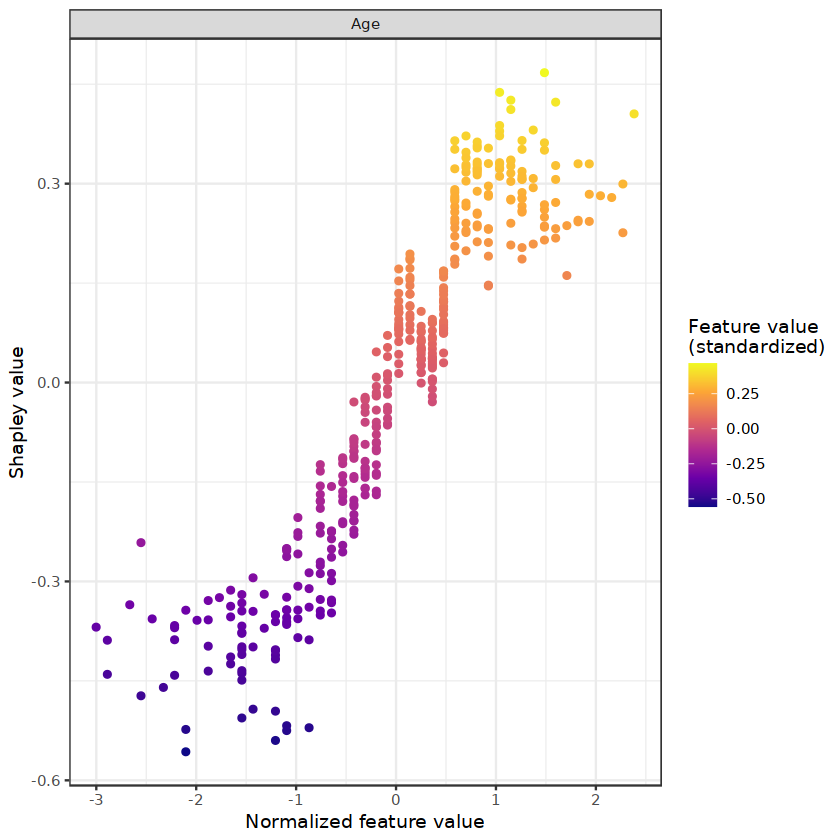

In [20]:
shap_df %>% 
  filter(feature %in% c("Age")) %>%
  ggplot(aes(x = feature_value, y = shap_value)) +
  geom_point(aes(color = shap_value)) +
  scale_colour_viridis_c(name = "Feature value\n(standardized)", option = "C") +
  facet_wrap(~ feature, scales = "free") +
  scale_y_continuous('Shapley value', labels = scales::comma) +
  xlab('Normalized feature value')+
  theme_bw()

In [21]:
pre_xgb1 = predict(xgb, data.matrix(X_test[,]))

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = y_test, predictor = as.numeric(pre_xgb1))

Data: as.numeric(pre_xgb1) in 222 controls (y_test 0) < 192 cases (y_test 1).
Area under the curve: 0.8725

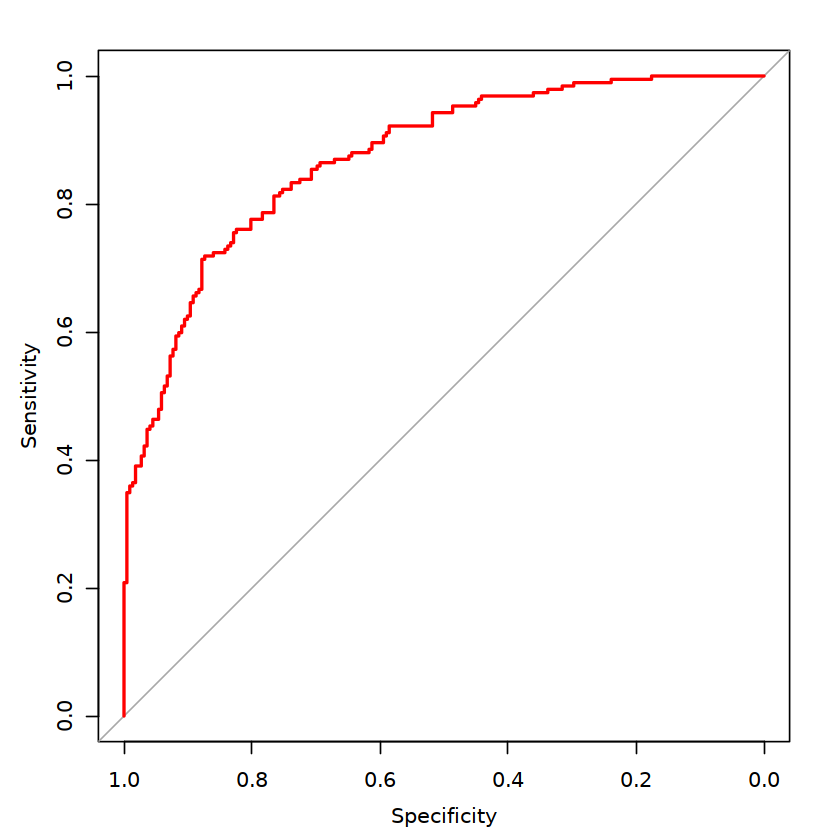

In [22]:
#ROC曲线
xgboost_roc <- roc(y_test,as.numeric(pre_xgb1))
xgboost_roc
plot.roc(xgboost_roc,col="red")  

In [23]:
pre_xgb = round(predict(xgb, data.matrix(X_test[,])))
tab = table(y_test,pre_xgb,dnn=c("true","pre"))
zhibiao = caret::confusionMatrix(tab,mode = "everything")

In [133]:
#saveRDS(pre_xgb1,file = 'model.XGBoost.rds')

In [24]:
zhibiao

Confusion Matrix and Statistics

    pre
true   0   1
   0 170  52
   1  41 151
                                          
               Accuracy : 0.7754          
                 95% CI : (0.7321, 0.8147)
    No Information Rate : 0.5097          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.5501          
                                          
 Mcnemar's Test P-Value : 0.2998          
                                          
            Sensitivity : 0.8057          
            Specificity : 0.7438          
         Pos Pred Value : 0.7658          
         Neg Pred Value : 0.7865          
              Precision : 0.7658          
                 Recall : 0.8057          
                     F1 : 0.7852          
             Prevalence : 0.5097          
         Detection Rate : 0.4106          
   Detection Prevalence : 0.5362          
      Balanced Accuracy : 0.7748          
                 